In [1]:
import sklearn.preprocessing as pre, scipy, numpy as np, matplotlib.pyplot as plt, glob, sys, os
import pandas as pd, seaborn as sns, argparse, pyemma as py, pickle, copy
from sklearn.model_selection import train_test_split

sys.path.insert(1, '../msms/')
from utils import * 

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

Using TensorFlow backend.


control (50000, 8)
(8,) (8,)
b2 (50000, 8)
(8,) (8,)
b4 (50000, 8)
(8,) (8,)
b6 (40000, 8)
(8,) (8,)
control (50000, 8)
(8,) (8,)
b2 (50000, 8)
(8,) (8,)
b4 (50000, 8)
(8,) (8,)
b6 (48000, 8)
(8,) (8,)
control (50000, 8)
(8,) (8,)
b2 (50000, 8)
(8,) (8,)
b4 (50000, 8)
(8,) (8,)
b6 (50000, 8)
(8,) (8,)
control (50000, 8)
(8,) (8,)
b2 (50000, 8)
(8,) (8,)
b4 (50000, 8)
(8,) (8,)
b6 (48000, 8)
(8,) (8,)


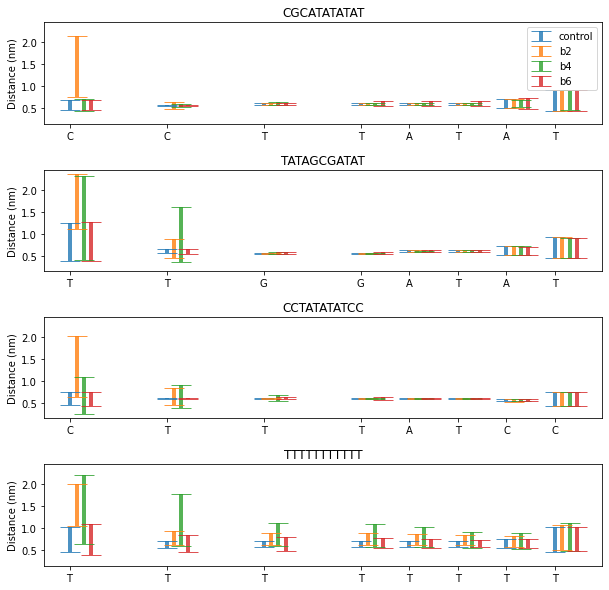

In [5]:
# read in low temp data
seq_list = ['CGCATATATAT', 'TATAGCGATAT', 'CCTATATATCC', 'TTTTTTTTTTT']
suffix = '293K'

# add in low temp data and cluster in same set of microstates defined above
start, end = 0, 2000
dtraj_low_list = []

# plot to look for differences in the bases
fig, axes = plt.subplots(4, figsize=(10, 10), sharey=True)
pstride = 100

# shared base pairs between sequences
wc_idxs = np.array([10,19,28,37,47,57,67,77])
plot_list = np.array([0, 2, 4, 6, 7, 8, 9, 10])

for seq, ax in zip(seq_list, axes):
    base_list = [base for base in abasic_configs[seq].keys()]
    xticks = []
    for i in np.arange(len(seq)): 
        if i in plot_list: xticks.append(seq[i])
            
    for i, base in enumerate(base_list):

        # load low temp data
        npy_name = glob.glob(f'./{seq}_{suffix}/{base}*')[0]
        dists = np.load(npy_name)[:, start:end, :]

        # get common_idxs 
        common_idxs = translate_pairs(len(seq), base)
        dists = dists[:, :, common_idxs]
        dists = dists[:, :, wc_idxs]
        
        # only keep trajectories where theres is not complete dissociation
        dists = [d for d in dists if np.max(np.mean(d[:, 3:5], axis=1)) < 3]
        dists = np.concatenate(dists, axis=0)
        print(base, dists.shape)

        # get stats on each shared distance
        dist_means = np.mean(dists, axis=0)
        dist_stds = np.std(dists, axis=0)
        print(dist_means.shape, dist_stds.shape)

        ax.set_title(seq)
        ax.set_xticks(plot_list)
        ax.set_xticklabels(xticks)
        ax.set_ylabel('Distance (nm)')
        ax.errorbar(plot_list+i*0.15, dist_means, yerr=dist_stds, 
                         linestyle='', capsize=10, label=base, alpha=0.8, elinewidth=4)

axes[0].legend(loc='upper right')
plt.subplots_adjust(hspace=0.45)

control (50000, 10)
(10,) (10,)
b2 (50000, 10)
(10,) (10,)
b4 (50000, 10)
(10,) (10,)
b6 (50000, 10)
(10,) (10,)
control (50000, 10)
(10,) (10,)
b2 (50000, 10)
(10,) (10,)
b4 (50000, 10)
(10,) (10,)
b6 (48000, 10)
(10,) (10,)
control (50000, 10)
(10,) (10,)
b2 (50000, 10)
(10,) (10,)
b4 (50000, 10)
(10,) (10,)
b6 (50000, 10)
(10,) (10,)
control (50000, 10)
(10,) (10,)
b2 (50000, 10)
(10,) (10,)
b4 (50000, 10)
(10,) (10,)
b6 (46000, 10)
(10,) (10,)


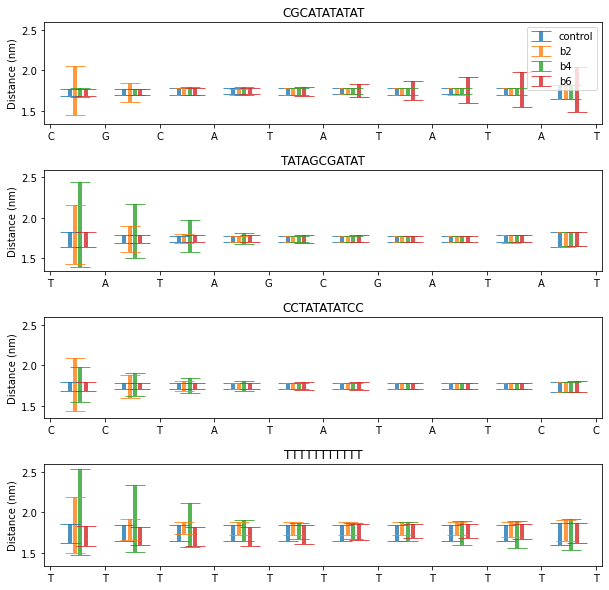

In [6]:
## repeat for phosphate distances (10 for each)

# read in low temp data
seq_list = ['CGCATATATAT', 'TATAGCGATAT', 'CCTATATATCC', 'TTTTTTTTTTT']
suffix = '293K'

# add in low temp data and cluster in same set of microstates defined above
start, end = 0, 2000
dtraj_low_list = []

# plot to look for differences in the bases
fig, axes = plt.subplots(4, figsize=(10, 10), sharey=True)
pstride = 100

# wc pairs
n_bp = 11
wc_idxs = [(n_bp-2)*(i+1) for i in range(n_bp-1)]

for seq, ax in zip(seq_list, axes):
    base_list = [base for base in abasic_configs[seq].keys()]
    xticks = [b for b in seq]
    for i in np.arange(len(seq)): 
        if i not in plot_list: xticks[i] == '_'
            
    for i, base in enumerate(base_list):

        # load low temp data
        npy_name = glob.glob(f'./{seq}_{suffix}-phos/{base}*')[0]
        dists = np.load(npy_name)[:, start:end, wc_idxs]
        
        # only keep trajectories where theres is not complete dissociation
        dists = [d for d in dists if np.max(np.mean(d[:, 4:6], axis=1)) < 3]
        dists = np.concatenate(dists, axis=0)
        print(base, dists.shape)

        # get stats on each shared distance
        dist_means = np.mean(dists, axis=0)
        dist_stds = np.std(dists, axis=0)
        print(dist_means.shape, dist_stds.shape)

        ax.set_title(seq)
        ax.set_xticks(np.arange(n_bp))
        ax.set_xticklabels([s for s in seq])
        ax.set_ylabel('Distance (nm)')
        ax.errorbar(0.35+np.arange(n_bp-1)+i*0.1, dist_means, yerr=dist_stds, 
                         linestyle='', capsize=10, label=base, alpha=0.8, elinewidth=4)

axes[0].legend(loc='upper right')
plt.subplots_adjust(hspace=0.45)

(90,)
(90,)
(90,)
(90,)


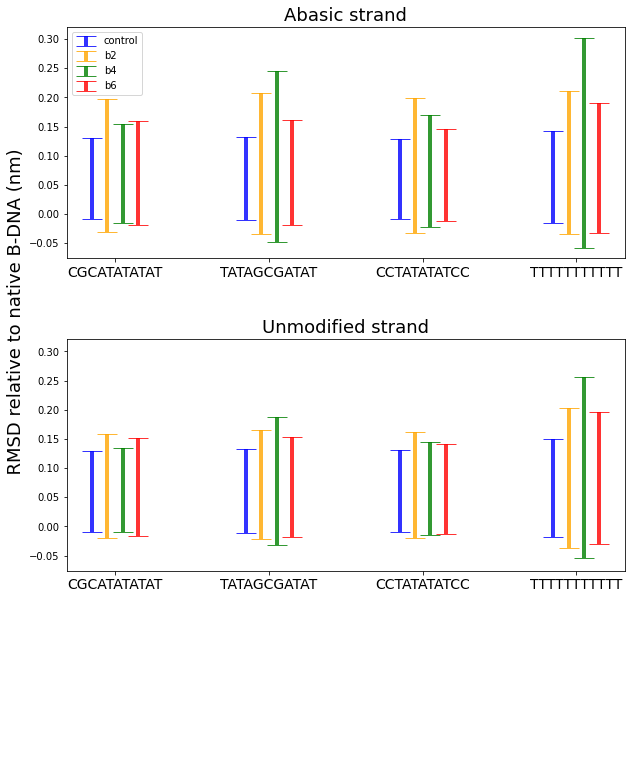

In [7]:
# check intramolecular RMSD against control

def intra_RMSDs(dists, ref_dists, n_intra):
    
    rmsd1 = np.sqrt((dists[:, :n_intra] - ref_dists[:n_intra])**2)
    rmsd2 = np.sqrt((dists[:, n_intra:] - ref_dists[n_intra:])**2)
    return rmsd1, rmsd2
    
# plot to look for differences in the bases
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
pstride = 100

# wc pairs
n_bp = 11
wc_idxs = [(n_bp-2)*(i+1) for i in range(n_bp-1)]
n_inter = (n_bp-1)**2
n_intra = (n_bp-1)*(n_bp-2)//2
color_list = ['blue', 'orange', 'green', 'red']

for j, seq in enumerate(seq_list):
    base_list = [base for base in abasic_configs[seq].keys()]
            
    for i, (base, color) in enumerate(zip(base_list, color_list)):

        # load low temp data
        npy_name = glob.glob(f'./{seq}_{suffix}-phos/{base}*')[0]
        dists = np.load(npy_name)[:, start:end, n_inter:]
        
        # only keep trajectories where theres is not complete dissociation
        dists = [d for d in dists if np.max(np.mean(d[:, wc_idxs[4:6]], axis=1)) < 3]
        
        dists = np.concatenate(dists, axis=0)
        if base=='control':
            control_ref = dists[0] #np.mean(dists, axis=0)
            print(np.shape(control_ref))
            
        # calculate RMSD relative to control
        rmsd1, rmsd2 = intra_RMSDs(dists, control_ref, n_intra)
        rmsd1_mean, rmsd1_std = np.mean(rmsd1), np.std(rmsd1)
        rmsd2_mean, rmsd2_std = np.mean(rmsd2), np.std(rmsd2)
        
        if seq == seq_list[0]: label = base
        else: label = ''
        axes[0].errorbar(-0.15+j+i*0.1, rmsd1_mean, yerr=rmsd1_std, linestyle='', 
                         capsize=10, label=label, color=color, alpha=0.8, elinewidth=4)
        axes[1].errorbar(-0.15+j+i*0.1, rmsd2_mean, yerr=rmsd2_std, linestyle='', 
                         capsize=10, label=label, color=color, alpha=0.8, elinewidth=4)

#axes.set_ylabel('Distance (nm)')
#axes.errorbar(0.35+np.arange(n_bp-1)+i*0.1, dist_means, yerr=dist_stds, linestyle='', capsize=10, label=base)

axes[0].legend()
axes[0].set_title('Abasic strand', fontsize=18 )
axes[1].set_title('Unmodified strand', fontsize=18 )

for ax in axes:
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels([seq for seq in seq_list], fontsize=14)
    
spaces = ' '*50
ax.set_ylabel(f'{spaces}RMSD relative to native B-DNA (nm)', fontsize=18 )
plt.subplots_adjust(hspace=0.35)


In [ ]:
# look for specific strcutural motics at abasic site
# map distance betweeen bare sugar and surrounding features?
# run some single-stranded simluations/dsDNA at consistent temp 300K ?